In [171]:
#!pip install xgboost

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 10.2 MB/s eta 0:00:00m eta 0:00:010:00:01


In [172]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import lightgbm as lgb
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix
import lightgbm as lgb

from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier


In [8]:
# CSVファイルの読み込み
data_file = "./../titanic/train.csv"
df = pd.read_csv(data_file)

# 分析クラスの作成

In [ ]:
class DataAnalyzer():
        def __init__()
            pass
        
        
        def set_model()
            # Light GBM、RF、XGBに対応したい。
            pass
        def set_model_params()
            pass
        def set_features()
            pass
        def get_model_config()
            pass
        def count_training_time()
            pass
        def count_estimating_time()
            pass
        
        


# データの概要 

## データの中身

In [9]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [47]:
df.size, df.dtypes

(10692,
 PassengerId      int64
 Survived         int64
 Pclass           int64
 Name            object
 Sex             object
 Age            float64
 SibSp            int64
 Parch            int64
 Ticket          object
 Fare           float64
 Cabin           object
 Embarked        object
 dtype: object)

In [ ]:
## 各カラムの基本統計量

In [40]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [50]:
target_col = "Age"
df.sort_values(target_col).head(100)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
803,804,1,3,"Thomas, Master. Assad Alexander",male,0.42,0,1,2625,8.5167,NaN,C
755,756,1,2,"Hamalainen, Master. Viljo",male,0.67,1,1,250649,14.5000,NaN,S
644,645,1,3,"Baclini, Miss. Eugenie",female,0.75,2,1,2666,19.2583,NaN,C
469,470,1,3,"Baclini, Miss. Helene Barbara",female,0.75,2,1,2666,19.2583,NaN,C
78,79,1,2,"Caldwell, Master. Alden Gates",male,0.83,0,2,248738,29.0000,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
764,765,0,3,"Eklund, Mr. Hans Linus",male,16.00,0,0,347074,7.7750,NaN,S
504,505,1,1,"Maioni, Miss. Roberta",female,16.00,0,0,110152,86.5000,B79,S
746,747,0,3,"Abbott, Mr. Rossmore Edward",male,16.00,1,1,C.A. 2673,20.2500,NaN,S
156,157,1,3,"Gilnagh, Miss. Katherine ""Katie""",female,16.00,0,0,35851,7.7333,NaN,Q


## 各カラムの説明

PassengerId: 乗客ID
Survived: 生存フラグ (1は生存、0は死亡)
Pclass: 乗客のチケットクラス、社会経済的地位（1 = 1等級、2 = 2等級、3 = 3等級）
Name: 乗客の氏名
Sex: 乗客の性別
Age: 乗客の年齢 (一部の乗客の年齢は推測値)
SibSp: 乗客が船上で一緒に旅行していた兄弟姉妹や配偶者の数
Parch: 乗客が船上で一緒に旅行していた親や子供の数
Ticket: 乗客のチケット番号
Fare: 乗客がチケットに支払った料金
Cabin: 乗客が宿泊した船室の番号
Embarked: 乗客が乗船した港を示します（C = Cherbourg, Q = Queenstown, S = Southampton）

## 欠損値

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64


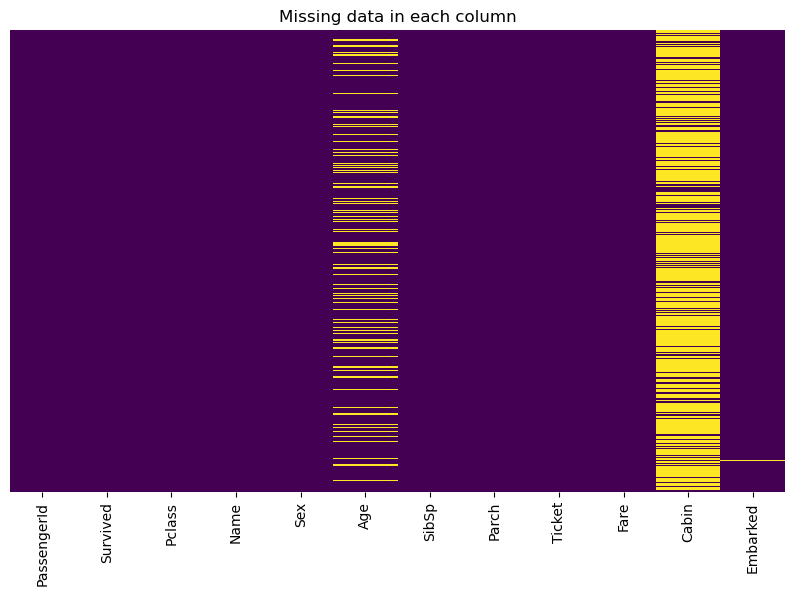

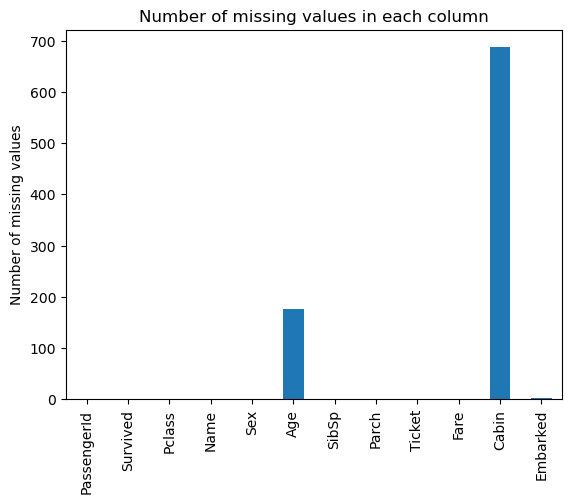

In [11]:
# 各カラムの欠損値の数を計算
missing_values = df.isnull().sum()

# 欠損値の数を表示
print(missing_values)

# 欠損値の可視化
plt.figure(figsize=(10,6))
sns.heatmap(df.isnull(), yticklabels=False, cbar=False, cmap='viridis')
plt.title('Missing data in each column')
plt.show()

# 棒グラフで表示
missing_values.plot(kind='bar')
plt.title('Number of missing values in each column')
plt.ylabel('Number of missing values')
plt.show()

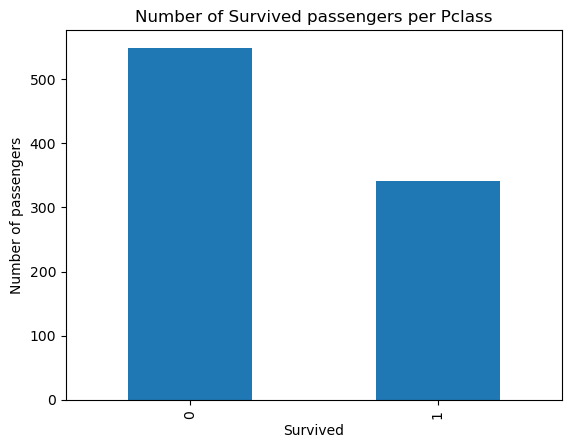

In [86]:
survived_count = df['Survived'].value_counts()
survived_count.plot(kind='bar')
plt.title('Number of Survived passengers per Pclass')
plt.ylabel('Number of passengers')
plt.show()

# 男性(or女性)が世帯持ちか否かと生存率の関係

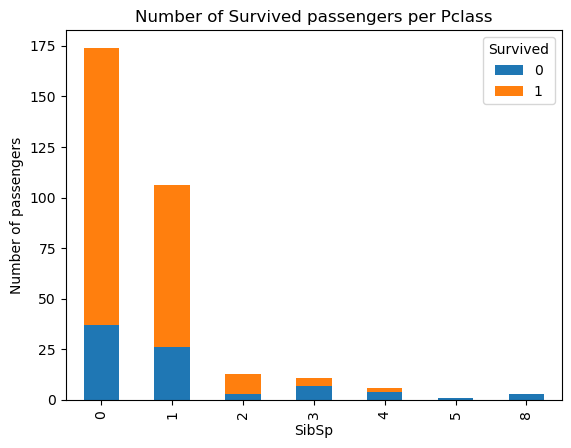

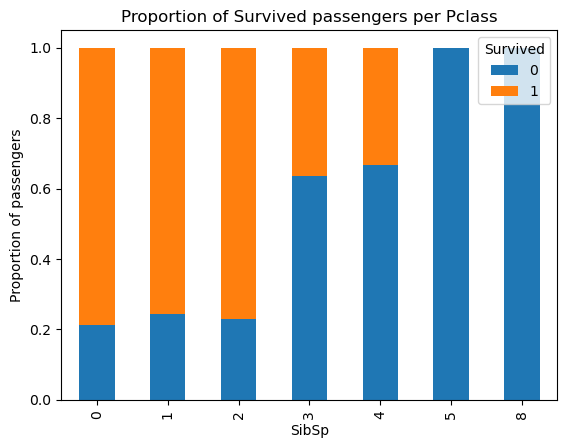

In [95]:
target_sex = "female"
# PclassごとにSurvivedのデータ数を集計
df_male = df[df['Sex'] == target_sex]
survived_count = df_male.groupby('SibSp')['Survived'].value_counts()

# 棒グラフで表示
survived_count.unstack().plot(kind='bar', stacked=True)
plt.title('Number of Survived passengers per Pclass')
plt.ylabel('Number of passengers')
plt.show()

# 各Pclassの乗客数で正規化して割合を計算
survived_ratio = survived_count.unstack().apply(lambda x: x/x.sum(), axis=1)

# 棒グラフで表示
survived_ratio.plot(kind='bar', stacked=True)
plt.title('Proportion of Survived passengers per Pclass')
plt.ylabel('Proportion of passengers')
plt.show()

# Fareと生存率の関係

In [125]:
df.columns
def show_hist(column,  bins = 5, ratio = True, fillna = True, set_bins = None):
        tdf = df.copy()
        if fillna:
            tdf[column] = tdf[column].fillna( -100)
            
        if set_bins:
            tdf['Group'] = pd.cut(df[column], bins = set_bins)
        else:
            tdf['Group'] = pd.cut(df[column], bins = bins)
        #plt.hist(tdf['Group'])
        survived_count = tdf.groupby('Group')['Survived'].value_counts()
        # 棒グラフで表示
        if ratio: 
            survived_ratio = survived_count.unstack().apply(lambda x: x/x.sum(), axis=1)
            survived_ratio.plot(kind='bar', stacked=True)
        else:
            survived_count.unstack().plot(kind='bar', stacked=True)
        plt.show()

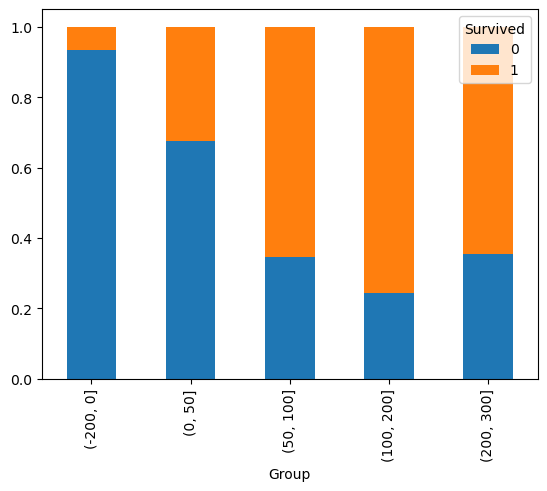

In [127]:
show_hist("Fare",  bins = 10, ratio = True, set_bins = [-200, 0, 50, 100, 200, 300])  

In [ ]:
Fare

target_sex = "female"
# PclassごとにSurvivedのデータ数を集計
df_male = df[df['Sex'] == target_sex]
survived_count = df_male.groupby('SibSp')['Survived'].value_counts()

# 棒グラフで表示
survived_count.unstack().plot(kind='bar', stacked=True)
plt.title('Number of Survived passengers per Pclass')
plt.ylabel('Number of passengers')
plt.show()

# 各Pclassの乗客数で正規化して割合を計算
survived_ratio = survived_count.unstack().apply(lambda x: x/x.sum(), axis=1)

# 棒グラフで表示
survived_ratio.plot(kind='bar', stacked=True)
plt.title('Proportion of Survived passengers per Pclass')
plt.ylabel('Proportion of passengers')
plt.show()

## チケットクラスごとの生存数と生存率

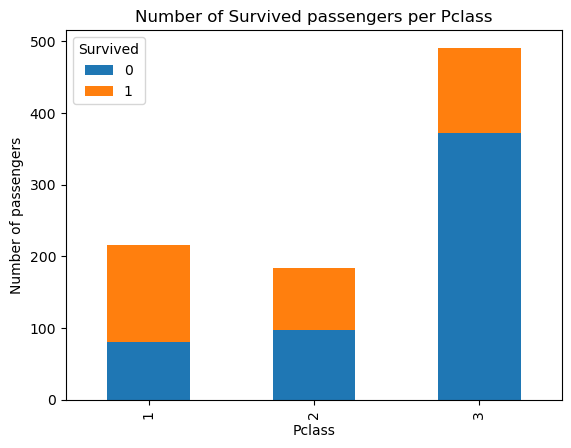

In [22]:

# PclassごとにSurvivedのデータ数を集計
survived_count = df.groupby('Pclass')['Survived'].value_counts()

# 棒グラフで表示
survived_count.unstack().plot(kind='bar', stacked=True)
plt.title('Number of Survived passengers per Pclass')
plt.ylabel('Number of passengers')
plt.show()

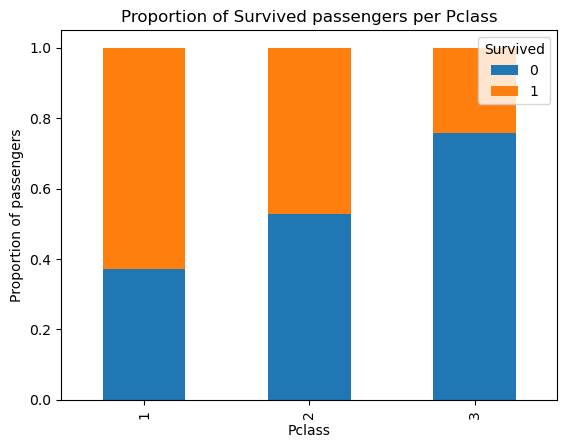

In [17]:
# 各Pclassの乗客数で正規化して割合を計算
survived_ratio = survived_count.unstack().apply(lambda x: x/x.sum(), axis=1)

# 棒グラフで表示
survived_ratio.plot(kind='bar', stacked=True)
plt.title('Proportion of Survived passengers per Pclass')
plt.ylabel('Proportion of passengers')
plt.show()

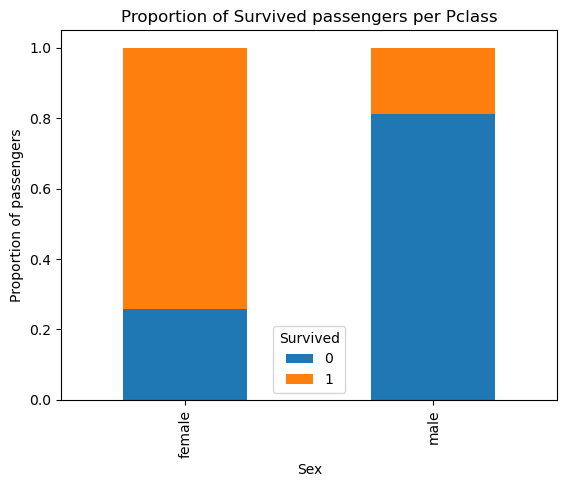

In [21]:
# PclassごとにSurvivedのデータ数を集計
survived_count = df.groupby('Sex')['Survived'].value_counts()
survived_ratio = survived_count.unstack().apply(lambda x: x/x.sum(), axis=1)

# 棒グラフで表示
survived_ratio.plot(kind='bar', stacked=True)
plt.title('Proportion of Survived passengers per  Sex')
plt.ylabel('Proportion of passengers')
plt.show()

In [69]:
df_ag.sort_values(target_col).head(715)
df_ag

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,AgeGroup
803,804,1,3,"Thomas, Master. Assad Alexander",male,0.42,0,1,2625,8.5167,NaN,C,"(0.0, 10.0]"
755,756,1,2,"Hamalainen, Master. Viljo",male,0.67,1,1,250649,14.5000,NaN,S,"(0.0, 10.0]"
644,645,1,3,"Baclini, Miss. Eugenie",female,0.75,2,1,2666,19.2583,NaN,C,"(0.0, 10.0]"
469,470,1,3,"Baclini, Miss. Helene Barbara",female,0.75,2,1,2666,19.2583,NaN,C,"(0.0, 10.0]"
78,79,1,2,"Caldwell, Master. Alden Gates",male,0.83,0,2,248738,29.0000,NaN,S,"(0.0, 10.0]"
...,...,...,...,...,...,...,...,...,...,...,...,...,...
493,494,0,1,"Artagaveytia, Mr. Ramon",male,71.00,0,0,PC 17609,49.5042,NaN,C,"(70.0, 80.0]"
96,97,0,1,"Goldschmidt, Mr. George B",male,71.00,0,0,PC 17754,34.6542,A5,C,"(70.0, 80.0]"
851,852,0,3,"Svensson, Mr. Johan",male,74.00,0,0,347060,7.7750,NaN,S,"(70.0, 80.0]"
630,631,1,1,"Barkworth, Mr. Algernon Henry Wilson",male,80.00,0,0,27042,30.0000,A23,S,"(70.0, 80.0]"


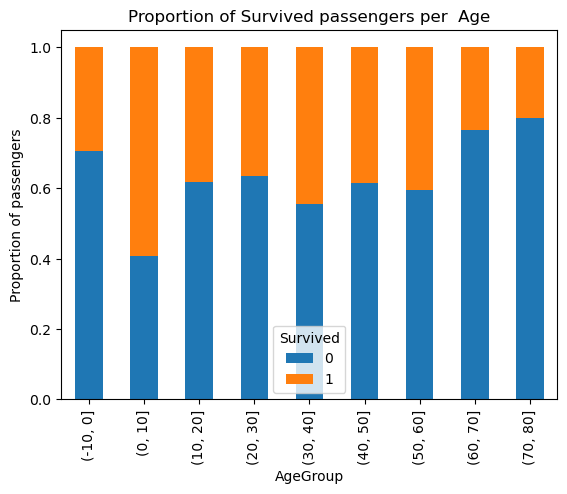

In [84]:
# PclassごとにSurvivedのデータ数を集計
# Ageを年代に集約する
df_ag = df.copy()
df_ag['Age'] = df_ag['Age'].fillna( -5)
#df_ag['AgeGroup'] = pd.cut(df['Age'], bins=[0, 10, 20, 30, 40, 50, 60, 70, 80], labels=[' 00代', '10代', '20代', '30代', '40代', '50代', '60代', '70代', '80代以上'])
df_ag['AgeGroup'] = pd.cut(df_ag['Age'], bins=[-10, 0, 10, 20, 30, 40, 50, 60, 70, 80])
df_ag

target_col = "Age"
df_ag.sort_values(target_col).head(600)

survived_count = df_ag.groupby('AgeGroup')['Survived'].value_counts()
survived_ratio = survived_count.unstack().apply(lambda x: x/x.sum(), axis=1)

# 棒グラフで表示
survived_ratio.plot(kind='bar', stacked=True)
plt.title('Proportion of Survived passengers per  Age')
plt.ylabel('Proportion of passengers')
plt.show()

In [82]:
df_ag.sort_values(target_col).tail(600)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,AgeGroup
884,885,0,3,"Sutehall, Mr. Henry Jr",male,25.0,0,0,SOTON/OQ 392076,7.0500,NaN,S,"(20.0, 30.0]"
703,704,0,3,"Gallagher, Mr. Martin",male,25.0,0,0,36864,7.7417,NaN,Q,"(20.0, 30.0]"
75,76,0,3,"Moen, Mr. Sigurd Hansen",male,25.0,0,0,348123,7.6500,F G73,S,"(20.0, 30.0]"
729,730,0,3,"Ilmakangas, Miss. Pieta Sofia",female,25.0,1,0,STON/O2. 3101271,7.9250,NaN,S,"(20.0, 30.0]"
353,354,0,3,"Arnold-Franchi, Mr. Josef",male,25.0,1,0,349237,17.8000,NaN,S,"(20.0, 30.0]"
...,...,...,...,...,...,...,...,...,...,...,...,...,...
560,561,0,3,"Morrow, Mr. Thomas Rowan",male,89.0,0,0,372622,7.7500,NaN,Q,NaN
552,553,0,3,"O'Brien, Mr. Timothy",male,89.0,0,0,330979,7.8292,NaN,Q,NaN
547,548,1,2,"Padro y Manent, Mr. Julian",male,89.0,0,0,SC/PARIS 2146,13.8625,NaN,C,NaN
573,574,1,3,"Kelly, Miss. Mary",female,89.0,0,0,14312,7.7500,NaN,Q,NaN


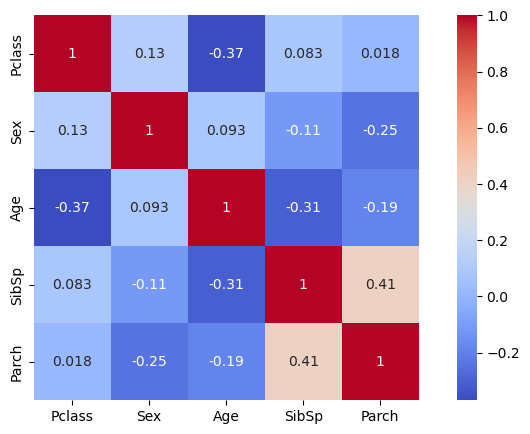

In [36]:
df4corr = df[ ['Pclass', 'Sex', 'Age', 'SibSp', 'Parch']].copy()
# sexカラムの値を変換する
df4corr['Sex'] = df4corr['Sex'].replace({'male': 1, 'female': 0})


corr=df4corr .corr()
plt.figure(figsize=(10,5))
ax = sns.heatmap(corr,annot=True,cmap='coolwarm')
ax.set_aspect('equal')

In [32]:
df4corr

,Pclass,Sex,Age,SibSp,Parch
0,3,male,22.0,1,0
1,1,female,38.0,1,0
2,3,female,26.0,0,0
3,1,female,35.0,1,0
4,3,male,35.0,0,0
...,...,...,...,...,...
886,2,male,27.0,0,0
887,1,female,19.0,0,0
888,3,female,NaN,1,2
889,1,male,26.0,0,0


## いったん予測する

In [141]:
df.columns.values

array(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'], dtype=object)

In [165]:
# 特徴量とターゲット変数を設定する
features = ['Pclass', 'Sex', 'Age', 'SibSp', 'Parch']
features = ['Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked']
target = 'Survived'

cats = ['Sex', 'Ticket', 'Cabin', 'Embarked']
for c in cats:
    df[c] = df[c].astype('category')

    
X = df[features]
y = df[target]
# 訓練データとテストデータに分割する
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

"""
# LightGBMのデータセットに変換する
train_data = lgb.Dataset(X_train, label=y_train, categorical_feature=categorical_cols)

# ハイパーパラメータを設定する（適宜調整してください）
params = {
    'objective': 'binary',
    'metric': 'binary_logloss',
    'boosting_type': 'gbdt',
    'num_leaves': 31,
    'learning_rate': 0.05,
    'feature_fraction': 0.9,
    'bagging_fraction': 0.8,
    'bagging_freq': 5,
    'verbose': 0,
    'random_state': 42
}

# LightGBMモデルを訓練する
model = lgb.train(params, train_data, num_boost_round=100)

# テストデータを予測する
y_pred = model.predict(X_test)
y_pred_binary = [round(value) for value in y_pred]

# 正解率を評価する
accuracy = accuracy_score(y_test, y_pred_binary)
print("Accuracy:", accuracy)
"""

'\n# LightGBMのデータセットに変換する\ntrain_data = lgb.Dataset(X_train, label=y_train, categorical_feature=categorical_cols)\n\n# ハイパーパラメータを設定する（適宜調整してください）\nparams = {\n    \'objective\': \'binary\',\n    \'metric\': \'binary_logloss\',\n    \'boosting_type\': \'gbdt\',\n    \'num_leaves\': 31,\n    \'learning_rate\': 0.05,\n    \'feature_fraction\': 0.9,\n    \'bagging_fraction\': 0.8,\n    \'bagging_freq\': 5,\n    \'verbose\': 0,\n    \'random_state\': 42\n}\n\n# LightGBMモデルを訓練する\nmodel = lgb.train(params, train_data, num_boost_round=100)\n\n# テストデータを予測する\ny_pred = model.predict(X_test)\ny_pred_binary = [round(value) for value in y_pred]\n\n# 正解率を評価する\naccuracy = accuracy_score(y_test, y_pred_binary)\nprint("Accuracy:", accuracy)\n'

In [166]:



X_train, X_validation, y_train, y_validation = train_test_split(X, y, test_size=0.2,random_state=0)

# パラメータの準備
params = {
    'boosting_type':'gbdt',
    'objective':'binary',
#    'metric':'auc',
    'metric': 'binary_logloss',
    'num_leaves':16,
    'learning_rate':0.1,
    'n_estimators':100000,
    'random_state':0
}

# インスタンスの作成
clf = lgb.LGBMClassifier(**params)

# モデルの学習
clf.fit(
    X_train, 
    y_train,
    eval_set = [(X_train, y_train),(X_validation, y_validation)],
    early_stopping_rounds=100)


clf.best_iteration_

/Users/ryuku.nobusue/miniforge3/envs/my_env/lib/python3.10/site-packages/lightgbm/sklearn.py:726: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "
/Users/ryuku.nobusue/miniforge3/envs/my_env/lib/python3.10/site-packages/lightgbm/basic.py:1780: UserWarning: Overriding the parameters from Reference Dataset.
  _log_warning('Overriding the parameters from Reference Dataset.')
/Users/ryuku.nobusue/miniforge3/envs/my_env/lib/python3.10/site-packages/lightgbm/basic.py:1513: UserWarning: categorical_column in param dict is overridden.
  _log_warning(f'{cat_alias} in param dict is overridden.')


[1]	training's binary_logloss: 0.619463	valid_1's binary_logloss: 0.622777
[2]	training's binary_logloss: 0.582443	valid_1's binary_logloss: 0.587348
[3]	training's binary_logloss: 0.552014	valid_1's binary_logloss: 0.559664
[4]	training's binary_logloss: 0.526652	valid_1's binary_logloss: 0.536738
[5]	training's binary_logloss: 0.504667	valid_1's binary_logloss: 0.515883
[6]	training's binary_logloss: 0.486162	valid_1's binary_logloss: 0.499421
[7]	training's binary_logloss: 0.469792	valid_1's binary_logloss: 0.486339
[8]	training's binary_logloss: 0.455443	valid_1's binary_logloss: 0.472783
[9]	training's binary_logloss: 0.442843	valid_1's binary_logloss: 0.462463
[10]	training's binary_logloss: 0.428948	valid_1's binary_logloss: 0.4511
[11]	training's binary_logloss: 0.416552	valid_1's binary_logloss: 0.442265
[12]	training's binary_logloss: 0.406018	valid_1's binary_logloss: 0.434862
[13]	training's binary_logloss: 0.396492	valid_1's binary_logloss: 0.427562
[14]	training's binary_

51

In [169]:
# 正解率を評価する
accuracy = accuracy_score(y_test, y_pred_binary)
print("Accuracy:", accuracy)

for feat, imp in zip(features, clf.feature_importances_):
    print(feat, "\t", imp)

Accuracy: 0.8268156424581006
Pclass 	 39
Sex 	 44
Age 	 286
SibSp 	 36
Parch 	 21
Ticket 	 0
Fare 	 291
Cabin 	 0
Embarked 	 48


In [158]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


# データの前処理

In [173]:
# 特徴量とターゲット変数を設定する
features = ['Pclass', 'Sex', 'Age', 'SibSp', 'Parch']
features = ['Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked']
target = 'Survived'

cats = ['Sex', 'Ticket', 'Cabin', 'Embarked']
for c in cats:
    df[c] = df[c].astype('category')

    
X = df[features]
y = df[target]
# 訓練データとテストデータに分割する
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train, X_validation, y_train, y_validation = train_test_split(X, y, test_size=0.2,random_state=0)

# Light GBM

In [174]:
# パラメータの準備
params = {
    'boosting_type':'gbdt',
    'objective':'binary',
#    'metric':'auc',
    'metric': 'binary_logloss',
    'num_leaves':16,
    'learning_rate':0.1,
    'n_estimators':100000,
    'random_state':0
}

# インスタンスの作成
clf = lgb.LGBMClassifier(**params)

# モデルの学習
clf.fit(
    X_train, 
    y_train,
    eval_set = [(X_train, y_train),(X_validation, y_validation)],
    early_stopping_rounds=100)


clf.best_iteration_

/Users/ryuku.nobusue/miniforge3/envs/my_env/lib/python3.10/site-packages/lightgbm/sklearn.py:726: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "
/Users/ryuku.nobusue/miniforge3/envs/my_env/lib/python3.10/site-packages/lightgbm/basic.py:1780: UserWarning: Overriding the parameters from Reference Dataset.
  _log_warning('Overriding the parameters from Reference Dataset.')
/Users/ryuku.nobusue/miniforge3/envs/my_env/lib/python3.10/site-packages/lightgbm/basic.py:1513: UserWarning: categorical_column in param dict is overridden.
  _log_warning(f'{cat_alias} in param dict is overridden.')


[1]	training's binary_logloss: 0.619463	valid_1's binary_logloss: 0.622777
[2]	training's binary_logloss: 0.582443	valid_1's binary_logloss: 0.587348
[3]	training's binary_logloss: 0.552014	valid_1's binary_logloss: 0.559664
[4]	training's binary_logloss: 0.526652	valid_1's binary_logloss: 0.536738
[5]	training's binary_logloss: 0.504667	valid_1's binary_logloss: 0.515883
[6]	training's binary_logloss: 0.486162	valid_1's binary_logloss: 0.499421
[7]	training's binary_logloss: 0.469792	valid_1's binary_logloss: 0.486339
[8]	training's binary_logloss: 0.455443	valid_1's binary_logloss: 0.472783
[9]	training's binary_logloss: 0.442843	valid_1's binary_logloss: 0.462463
[10]	training's binary_logloss: 0.428948	valid_1's binary_logloss: 0.4511
[11]	training's binary_logloss: 0.416552	valid_1's binary_logloss: 0.442265
[12]	training's binary_logloss: 0.406018	valid_1's binary_logloss: 0.434862
[13]	training's binary_logloss: 0.396492	valid_1's binary_logloss: 0.427562
[14]	training's binary_

51

In [175]:
# 正解率を評価する
accuracy = accuracy_score(y_test, y_pred_binary)
print("Accuracy:", accuracy)

for feat, imp in zip(features, clf.feature_importances_):
    print(feat, "\t", imp)

Accuracy: 0.8268156424581006
Pclass 	 39
Sex 	 44
Age 	 286
SibSp 	 36
Parch 	 21
Ticket 	 0
Fare 	 291
Cabin 	 0
Embarked 	 48


# XGBoost

# Random Forest